# Teleportation protocol

In [1]:
import sys; sys.path.insert(0, '..')
import random
import pyzx as zx
from fractions import Fraction
from ipywidgets import widgets
from IPython.display import display, Markdown
from pyzx.simplify import clifford_iter

In [3]:
#Setting random measurement outcomes
b_1 = random.randint(0, 1)
b_2 = random.randint(0, 1)

In [14]:
#Initializing the states
b_1 = 1 #Phase for a
b_2 = 0 #Phase for b

In [18]:
#Initializing arbitrary states
b_1 = random.randint(0, 1) #Phase for a 
b_2 = random.randint(0, 1) #Phase for b

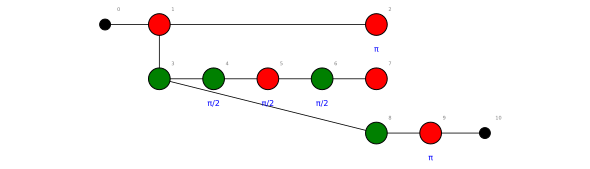

In [17]:
teleportation_circuit = zx.Graph()

t_i_1 = teleportation_circuit.add_vertex(0, 0, 0, Fraction(0))

t_a = teleportation_circuit.add_vertex(2, 0, 1, Fraction(0))
t_b = teleportation_circuit.add_vertex(2, 0, 5, Fraction(b_1))

#Qubit 2
t_c = teleportation_circuit.add_vertex(1, 1, 1, Fraction(0))
t_d = teleportation_circuit.add_vertex(1, 1, 2, Fraction(1/2))
t_e = teleportation_circuit.add_vertex(2, 1, 3, Fraction(1/2))
t_f = teleportation_circuit.add_vertex(1, 1, 4, Fraction(1/2))
t_g = teleportation_circuit.add_vertex(2, 1, 5, Fraction(b_2))

#Qubit 3
t_h = teleportation_circuit.add_vertex(1, 2, 5, Fraction(b_2))
t_i = teleportation_circuit.add_vertex(2, 2, 6, Fraction(b_1))

t_o_1 = teleportation_circuit.add_vertex(0, 2, 7, Fraction(0))

teleportation_circuit.add_edges([(t_i_1, t_a),(t_a, t_b), (t_a,t_c), (t_c,t_d), (t_d,t_e), (t_e,t_f), (t_f,t_g), (t_c, t_h), (t_h, t_i), (t_i, t_o_1)])

zx.draw_matplotlib(teleportation_circuit, labels=True)

In [14]:
g = teleportation_circuit.copy()
zx.clifford_simp(g)  # simplifies the diagram
g.normalize()  # makes it more presentable
zx.draw_matplotlib(g)

TypeError: Diagram is not a well-typed ZX-diagram: contains isolated boundary vertex.

In [5]:
graph = teleportation_circuit.copy()
graphs = [zx.draw_matplotlib(graph)]
names = ["start"]
for gs, n in clifford_iter(graph):
    graphs.append(zx.draw_matplotlib(gs))
    names.append(n)
zx.drawing.pack_circuit_nf(gs,'grg')
graphs.append(zx.draw_matplotlib(gs))
names.append("reposition")

def plotter(rewrite):
    display(Markdown("Rewrite step: " + names[rewrite]))
    display(graphs[rewrite])

w = widgets.interactive(plotter, rewrite=(0,len(graphs)-1))
slider = w.children[0]
slider.layout.width = "{!s}px".format(min(800,50*len(graphs)))
output = w.children[-1]
output.layout.height = "{!s}px".format(204*20)
slider.value = 0
w

interactive(children=(IntSlider(value=0, description='rewrite', layout=Layout(width='500px'), max=9), Output(l…